Epoch 1/1000
826/826 - 0s - loss: 0.5428 - mean_squared_error: 0.5428 - val_loss: 0.4175 - val_mean_squared_error: 0.4175 - 498ms/epoch - 603us/step
Epoch 2/1000
826/826 - 0s - loss: 0.3832 - mean_squared_error: 0.3832 - val_loss: 0.3939 - val_mean_squared_error: 0.3939 - 280ms/epoch - 339us/step
Epoch 3/1000
826/826 - 0s - loss: 0.3685 - mean_squared_error: 0.3685 - val_loss: 0.4504 - val_mean_squared_error: 0.4504 - 292ms/epoch - 354us/step
Epoch 4/1000
826/826 - 0s - loss: 0.3563 - mean_squared_error: 0.3563 - val_loss: 0.3859 - val_mean_squared_error: 0.3859 - 287ms/epoch - 348us/step
Epoch 5/1000
826/826 - 0s - loss: 0.3536 - mean_squared_error: 0.3536 - val_loss: 0.3962 - val_mean_squared_error: 0.3962 - 277ms/epoch - 335us/step
Epoch 6/1000
826/826 - 0s - loss: 0.3441 - mean_squared_error: 0.3441 - val_loss: 0.3703 - val_mean_squared_error: 0.3703 - 286ms/epoch - 346us/step
Epoch 7/1000
826/826 - 0s - loss: 0.3391 - mean_squared_error: 0.3391 - val_loss: 0.3863 - val_mean_square

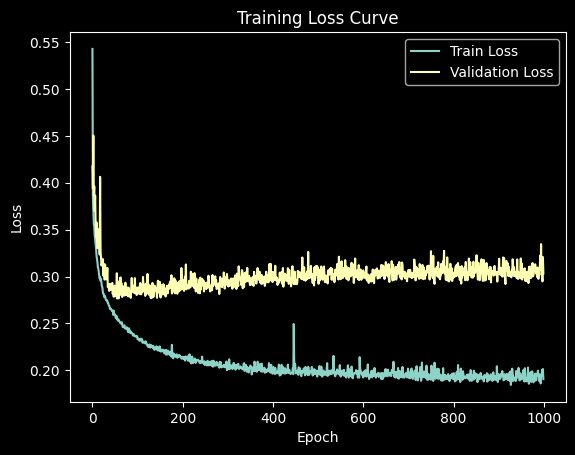

Train loss: 0.20541070401668549, Train MSE: 0.20541070401668549
Test Loss: 0.30938926339149475, Test MSE: 0.30938926339149475


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
import matplotlib.pyplot as plt

# Load and preprocess data
data = fetch_california_housing()
X, y = data.data, data.target.reshape(-1, 1)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential([
    Dense(20, activation='sigmoid', input_shape=(X_train.shape[1],)),
    Dense(20, activation='sigmoid'),
    Dense(20, activation='sigmoid'),
    Dense(20, activation='sigmoid'),
    Dense(1)  # Linear activation for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01),
              loss=MeanSquaredError(),
              metrics=['mean_squared_error'])

# Train the model
history = model.fit(X_train, y_train, epochs=1000, batch_size=16, validation_split=0.2, verbose=2)

# Plot Loss Curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

# Evaluate on Train Data
train_loss, train_mse = model.evaluate(X_train, y_train, verbose=0)
print(f"Train loss: {train_loss}, Train MSE: {train_mse}")

# Evaluate on Test Data
test_loss, test_mse = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}, Test MSE: {test_mse}")